# IMPUTER

# Take home exercise:  
Gunakan melb_data.csv dan isilah missing data pada dataset ini menggunakan simple imputer.  
Gunakan strategi yang sesuai.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer

In [2]:
# load data 
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
melb_outlier = pd.DataFrame(df.isna().sum(), columns=['jml'])
melb_outlier

,jml
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


In [4]:
# columns yg memiliki outliers 
melb_outlier = melb_outlier.loc[melb_outlier['jml'] != 0,:]
melb_outlier

,jml
Car,62
BuildingArea,6450
YearBuilt,5375
CouncilArea,1369


In [5]:
melb_outlier.index

Index(['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], dtype='object')

## Understanding features

In [6]:
df['Car'].unique() # akan di-Impute dgn median

array([ 1.,  0.,  2.,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10., nan])

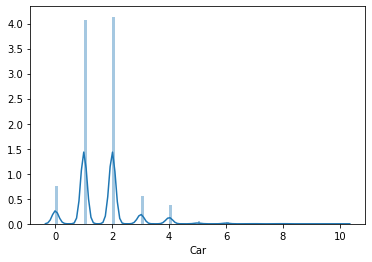

In [7]:
sns.distplot(df['Car'], bins=100)

In [8]:
df['Car'].median()

2.0

In [9]:
df['BuildingArea'].unique() # akan di-Impute dgn mean

array([         nan, 7.900000e+01, 1.500000e+02, 1.420000e+02,
       2.100000e+02, 1.070000e+02, 7.500000e+01, 1.900000e+02,
       9.400000e+01, 9.700000e+01, 1.100000e+02, 1.050000e+02,
       7.300000e+01, 1.350000e+02, 2.700000e+01, 6.000000e+01,
       8.500000e+01, 1.740000e+02, 5.000000e+01, 1.280000e+02,
       1.800000e+01, 1.240000e+02, 9.100000e+01, 8.200000e+01,
       8.100000e+01, 2.250000e+02, 1.450000e+02, 8.400000e+01,
       1.340000e+02, 1.160000e+02, 8.600000e+01, 1.270000e+02,
       1.860000e+02, 9.000000e+01, 1.330000e+02, 1.300000e+02,
       1.130000e+02, 1.000000e+02, 3.090000e+02, 1.920000e+02,
       1.260000e+02, 1.010000e+02, 1.020000e+02, 7.600000e+01,
       1.460000e+02, 1.980000e+02, 1.800000e+02, 1.590000e+02,
       1.220000e+02, 1.810000e+02, 9.800000e+01, 8.300000e+01,
       1.470000e+02, 2.540000e+02, 1.230000e+02, 1.310000e+02,
       3.400000e+01, 2.070000e+02, 6.800000e+01, 5.400000e+01,
       2.630000e+02, 2.030000e+02, 1.650000e+02, 1.4000

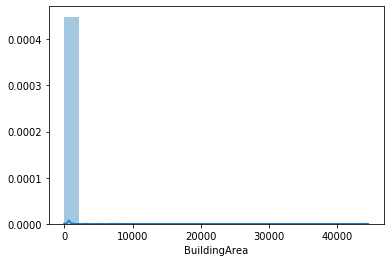

In [10]:
sns.distplot(df['BuildingArea'], bins=20)

In [11]:
df['YearBuilt'].unique() # akan di-Impute dgn mode

array([  nan, 1900., 2014., 1910., 1890., 2005., 2009., 1880., 1985.,
       2010., 1970., 2013., 2012., 1920., 1950., 1998., 1930., 2016.,
       1965., 1980., 2011., 2015., 1975., 1993., 1960., 2003., 1995.,
       1996., 2000., 1925., 2004., 2008., 1962., 1955., 1988., 1953.,
       1997., 1990., 2007., 1967., 1964., 1889., 1888., 2006., 1934.,
       1935., 1966., 1969., 1940., 1938., 1887., 1904., 1972., 1978.,
       1939., 1945., 1947., 1958., 2017., 1999., 1992., 1961., 1928.,
       1977., 1976., 2001., 1948., 1927., 1981., 1943., 1974., 1968.,
       1957., 1987., 1986., 1926., 2002., 1994., 1949., 1905., 1912.,
       1924., 1952., 1991., 1942., 1973., 1915., 2018., 1916., 1982.,
       1971., 1963., 1897., 1989., 1919., 1923., 1983., 1903., 1830.,
       1895., 1937., 1908., 1913., 1917., 1885., 1902., 1854., 1850.,
       1898., 1941., 1951., 1946., 1956., 1984., 1901., 1959., 1979.,
       1933., 1886., 1929., 1906., 1870., 1932., 1875., 1863., 1918.,
       1893., 1856.,

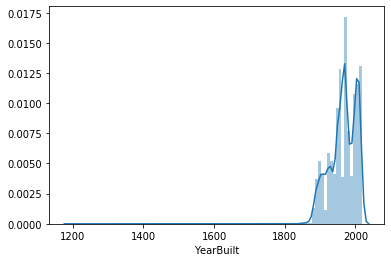

In [12]:
sns.distplot(df['YearBuilt'], bins=100)

In [13]:
df['CouncilArea'].unique() # akan di-Impute dgn mode

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [14]:
## Imputing

In [15]:
# input mean pada feature numerical

imp_mean = SimpleImputer(strategy='mean')
df[['BuildingArea']] = imp_mean.fit_transform(df[['BuildingArea']])

df.isna().sum()[melb_outlier.index]

Car               62
BuildingArea       0
YearBuilt       5375
CouncilArea     1369
dtype: int64

In [16]:
# input median pada data numerical berdistribusi tidak normal

imp_median = SimpleImputer(strategy='median')
df[['Car','YearBuilt']] = imp_median.fit_transform(df[['Car','YearBuilt']])

df.isna().sum()[melb_outlier.index]

Car                0
BuildingArea       0
YearBuilt          0
CouncilArea     1369
dtype: int64

In [17]:
# input mode pada feature categorical

imp_mode = SimpleImputer(strategy='most_frequent')
df[['CouncilArea']] = imp_mode.fit_transform(df[['CouncilArea']])

df.isna().sum()[melb_outlier.index]

Car             0
BuildingArea    0
YearBuilt       0
CouncilArea     0
dtype: int64